### Load the libraries

In [1]:
from Bio import SeqIO
import re
# import math

In [2]:
# Primary libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Secondary libraries
from tqdm import tqdm
# from scipy import stats
import scipy
# from glob import glob
import os
# from matplotlib import dates as mpl_dates
# import datetime
# from datetime import date
import matplotlib.patches as mpatches
# from matplotlib import cm
# from colorspacious import cspace_converter
# from collections import OrderedDict
# import matplotlib.ticker as ticker
from scipy.interpolate import make_interp_spline, BSpline

### Load the data

#### Baci

In [4]:
df_consensus01_baci_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus01_upstream_bacillus_subtilis.csv', 
                              header=0, names=['relative_pos', 'frequency'])
df_consensus02_baci_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus02_upstream_bacillus_subtilis.csv', 
                              header=0, names=['relative_pos', 'frequency'])

#### Strep

In [5]:
df_consensus01_strep_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus01_upstream_streptococcus_pneumoniae.csv', 
                              header=0, names=['relative_pos', 'frequency'])
df_consensus02_strep_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus02_upstream_streptococcus_pneumoniae.csv', 
                              header=0, names=['relative_pos', 'frequency'])

#### Kleb

In [6]:
df_consensus01_kleb_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus01_upstream_klebsiella_pneumoniae.csv', 
                              header=0, names=['relative_pos', 'frequency'])
df_consensus02_kleb_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus02_upstream_klebsiella_pneumoniae.csv', 
                              header=0, names=['relative_pos', 'frequency'])

#### E.coli

In [7]:
df_consensus01_ecoli_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus01_upstream_escherichia_coli_BW25113.csv', 
                              header=0, names=['relative_pos', 'frequency'])
df_consensus02_ecoli_up = pd.read_csv('./csv_files_for_promoters_consensus_motifs/consensus02_upstream_escherichia_coli_BW25113.csv', 
                              header=0, names=['relative_pos', 'frequency'])

### Visualization: Using Sliding window analysis

In [8]:
# # To do the flank calculations for all files
# directory = os.fsencode('./csv_files_for_motifs/')

# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
#     if filename.endswith('.csv'):
#         print(filename)
#         genbank_file_reader(filename)

In [9]:
list_of_dfs = [df_consensus01_baci_up, df_consensus02_baci_up, 
               df_consensus01_strep_up, df_consensus02_strep_up, 
               df_consensus01_kleb_up, df_consensus02_kleb_up, 
               df_consensus01_ecoli_up, df_consensus02_ecoli_up]

for df in list_of_dfs:
    df['MA_mean'] = df['frequency'
                 ].rolling(window=10, closed='both'
                          ).mean()
    df['MA_sum'] = df['frequency'
                 ].rolling(window=10, closed='both'
                          ).sum()

In [10]:
df_consensus01_baci_up.name = 'Bacillus Subtilis' 
df_consensus02_baci_up.name = 'Bacillus Subtilis'
df_consensus01_strep_up.name = 'Streptococcus Pneumoniae'
df_consensus02_strep_up.name = 'Streptococcus Pneumoniae'
df_consensus01_kleb_up.name = 'Klebsiella Pneumoniae'
df_consensus02_kleb_up.name = 'Klebsiella Pneumoniae'
df_consensus01_ecoli_up.name = 'Escherichia coli BW25113'
df_consensus02_ecoli_up.name = 'Escherichia coli BW25113'

##### Frequency plots

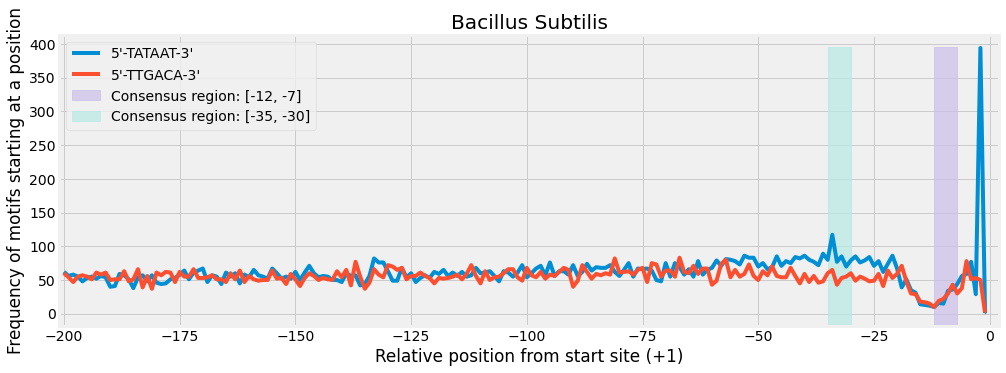

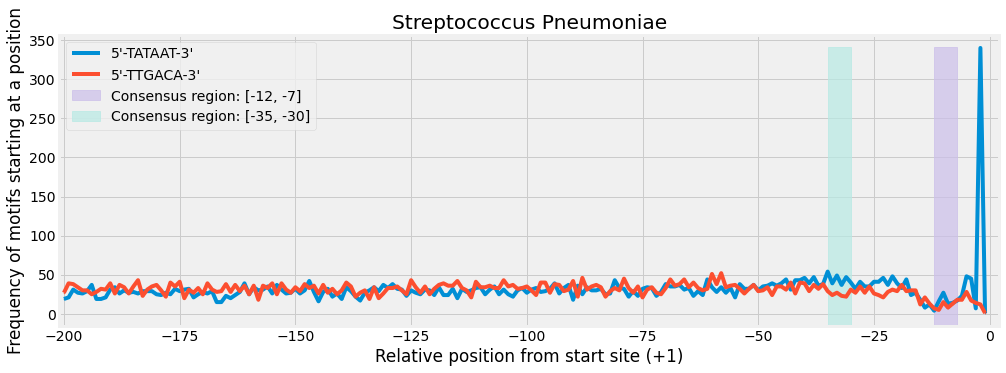

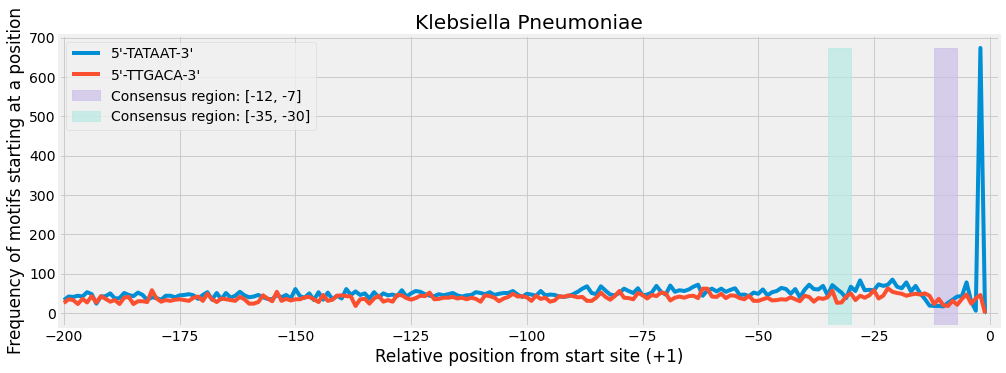

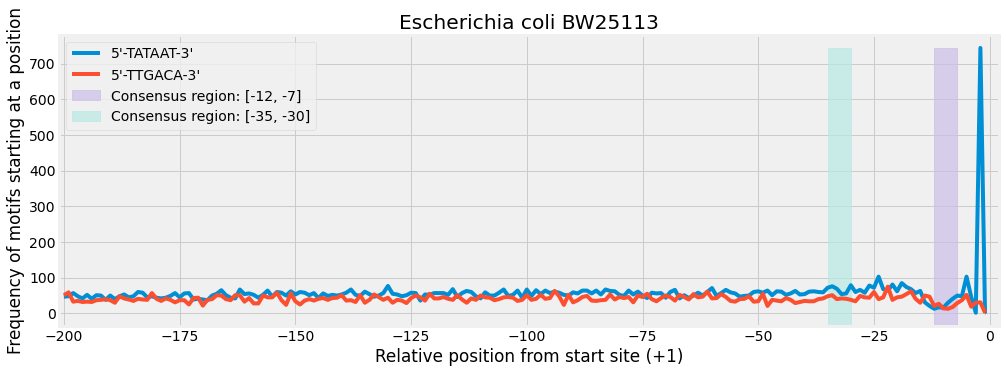

In [15]:
# Frequency plots

list_of_list_of_dfs = [[df_consensus01_baci_up, df_consensus02_baci_up], 
                       [df_consensus01_strep_up, df_consensus02_strep_up], 
                       [df_consensus01_kleb_up, df_consensus02_kleb_up], 
                       [df_consensus01_ecoli_up, df_consensus02_ecoli_up]]

for dfs_list in list_of_list_of_dfs:
    
    # print(f'df[0].name = {dfs_list[0].name}, df[1].name = {dfs_list[1]}')
#     print(dfs_list)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15, 5), facecolor=(1, 1, 1))
    plt.grid(True)

    plt.title(dfs_list[0].name)
    plt.xlabel('Relative position from start site (+1)')
    plt.ylabel('Frequency of motifs starting at a position')

    plt.plot(dfs_list[0].relative_pos, dfs_list[0].frequency, label="5'-TATAAT-3'", 
             marker='o', markersize=0.5)
    plt.plot(dfs_list[1].relative_pos, dfs_list[1].frequency,label="5'-TTGACA-3'", 
             marker='o', markersize=0.5)
    # plt.xticks(np.arange(min(df_heatmap_per_pt1.genome_positions), max(df_heatmap_per_pt1.genome_positions)+1, 500), rotation=90, fontsize=20)
    # plt.yticks(fontsize=20)
#     print(max(max(dfs_list[0]), max(dfs_list[1])))
    min_val, max_val = plt.gca().get_ylim()
#     max_val = max(max(dfs_list[0].frequency), max(dfs_list[1].frequency)) + 10000
    # Adding patches for regions (according to NCBI annotation)
    # Consensus regions (colors- peach: #F6C9BC, purple: #CCBFE9, skyblue: #B8E9E4)
    consensus_region_1 = mpatches.Rectangle((-12, min_val), 5, max_val, fill=True,
                                  color="#CCBFE9", alpha=0.7, linewidth=1, label='Consensus region: [-12, -7]')
    plt.gca().add_patch(consensus_region_1)

    consensus_region_2 = mpatches.Rectangle((-35, min_val), 5, max_val, fill=True,
                                  color="#B8E9E4", alpha=0.7, linewidth=1, label='Consensus region: [-35, -30]')
    plt.gca().add_patch(consensus_region_2)

#     plt.ylim(-1.5, max_val)
    plt.xlim(-201, +2)
    # plt.xticks(rotation=90)
    # plt.xticks(fontsize="x-large")
    # plt.yticks(fontsize="x-large")
    plt.legend(loc = 'best')
    # plt.legend(fontsize="x-large")
    # plt.savefig('plots_void_story/ma7_top5000.png', dpi=1000, bbox_inches='tight')

##### Division by summed value normalization: MA_sum- SWAN plots

0.008259892043403976
0.009565282064971804
0.010237950023370523


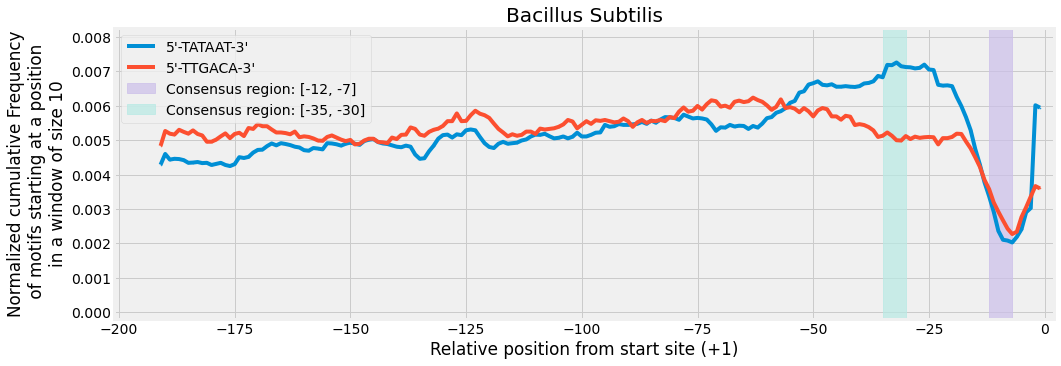

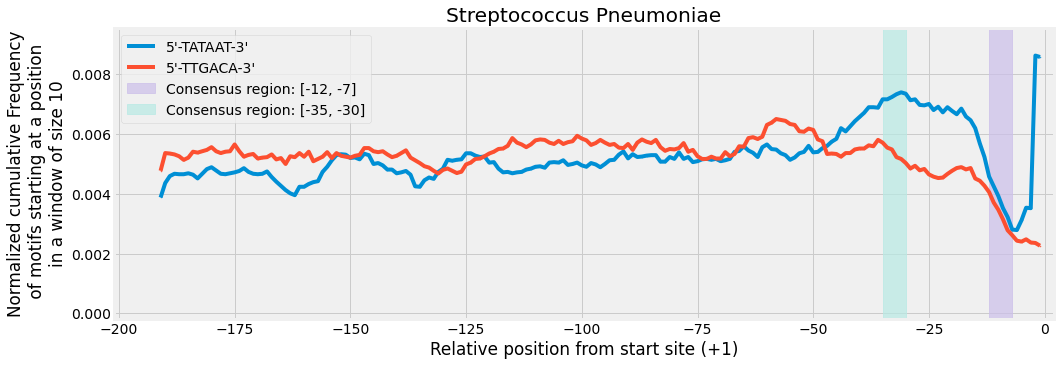

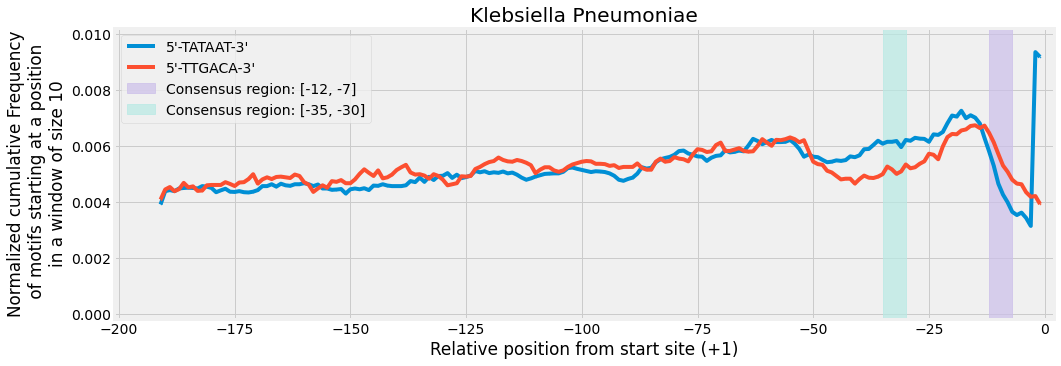

In [59]:
# Norm 2: Division by summed value normalization: MA_sum- SWAN plots


list_of_list_of_dfs = [[df_consensus01_baci_up, df_consensus02_baci_up], 
               [df_consensus01_strep_up, df_consensus02_strep_up], 
               [df_consensus01_kleb_up, df_consensus02_kleb_up]]

for dfs_list in list_of_list_of_dfs:
    
    # print(f'df[0].name = {dfs_list[0].name}, df[1].name = {dfs_list[1]}')
#     print(dfs_list)
    normalized_series_of_df0 = dfs_list[0].MA_sum / dfs_list[0].MA_sum.sum()
    normalized_series_of_df1 = dfs_list[1].MA_sum / dfs_list[1].MA_sum.sum()
    
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15, 5), facecolor=(1, 1, 1))
    plt.grid(True)

    plt.title(dfs_list[0].name)
    plt.xlabel('Relative position from start site (+1)')
    plt.ylabel('Normalized cumulative Frequency\n of motifs starting at a position\nin a window of size 10')

    plt.plot(dfs_list[0].relative_pos, normalized_series_of_df0, label="5'-TATAAT-3'", 
             marker='o', markersize=0.5)
    plt.plot(dfs_list[1].relative_pos, normalized_series_of_df1,label="5'-TTGACA-3'", 
             marker='o', markersize=0.5)
    # plt.xticks(np.arange(min(df_heatmap_per_pt1.genome_positions), max(df_heatmap_per_pt1.genome_positions)+1, 500), rotation=90, fontsize=20)
    # plt.yticks(fontsize=20)
    min_val = 0
    max_val = max(normalized_series_of_df0.max(), normalized_series_of_df1.max()
                 ) + max(normalized_series_of_df0.std(), normalized_series_of_df1.std())
    print(max_val)
    # Adding patches for regions (according to NCBI annotation)
    # Consensus regions (colors- peach: #F6C9BC, purple: #CCBFE9, skyblue: #B8E9E4)
    consensus_region_1 = mpatches.Rectangle((-12, min_val-1), 5, max_val+10, fill=True,
                                  color="#CCBFE9", alpha=0.7, linewidth=1, label='Consensus region: [-12, -7]')
    plt.gca().add_patch(consensus_region_1)

    consensus_region_2 = mpatches.Rectangle((-35, min_val-1), 5, max_val+10, fill=True,
                                  color="#B8E9E4", alpha=0.7, linewidth=1, label='Consensus region: [-35, -30]')
    plt.gca().add_patch(consensus_region_2)

    plt.ylim(min_val-0.0002, max_val)
    plt.xlim(-201, +2)
    # plt.xticks(rotation=90)
    # plt.xticks(fontsize="x-large")
    # plt.yticks(fontsize="x-large")
    plt.legend(loc = 'best')
    # plt.legend(fontsize="x-large")
    # plt.savefig('plots_void_story/ma7_top5000.png', dpi=1000, bbox_inches='tight')